# Library Packages for Data Analysis Manipulation and Machine Learning

In [1]:
#Import linear algebra and data manipulation packages
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import unidecode as uni
import calendar
from datetime import datetime
from tabulate import tabulate

#Import plotting packages
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

#Import machine learning packages
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics

# Import Listings Dataset

In [2]:
#import the listings dataset
listings_df = pd.read_csv('C:/Users/polym/listings.csv')

#find number of listings and number of hosts
listings_number = listings_df['id'].count()
hosts_number = len(listings_df['host_id'].unique())

print('listings.csv dataset contains information on %d listings provided by %d hosts.' % (listings_number, hosts_number))

#print first 10 rows of listings dataset                                                                                          #hosts_number))
listings_df.head()

listings.csv dataset contains information on 9673 listings provided by 4809 hosts.


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20211223003724,2021-12-23,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,https://www.airbnb.com/users/show/37177,...,4.84,4.50,4.66,00000957568,t,6,6,0,0,0.25
1,10990,https://www.airbnb.com/rooms/10990,20211223003724,2021-12-23,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,https://www.airbnb.com/users/show/37177,...,4.91,4.81,4.79,00001070920,t,6,6,0,0,0.48
2,10993,https://www.airbnb.com/rooms/10993,20211223003724,2021-12-23,Athens Quality Apartments - Studio,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,https://www.airbnb.com/users/show/37177,...,4.97,4.83,4.80,00000957080,t,6,6,0,0,0.67
3,10995,https://www.airbnb.com/rooms/10995,20211223003724,2021-12-23,"AQA-No2 1-bedroom, smart tv, fiber connection,","AQA No2 is 1-bedroom apartment (47m2), on the ...",Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/6a565613-aaa3...,37177,https://www.airbnb.com/users/show/37177,...,4.88,4.80,4.80,00000957422,t,6,6,0,0,0.19
4,27262,https://www.airbnb.com/rooms/27262,20211223003724,2021-12-23,"54m2, 1-br, cable tv, wi-fi, metro",Big 1-bedroom apartment that can accommodate 4...,NaN,https://a0.muscache.com/pictures/8651803/4b82b...,37177,https://www.airbnb.com/users/show/37177,...,5.00,4.69,4.63,00000957579,t,6,6,0,0,0.15


<AxesSubplot:>

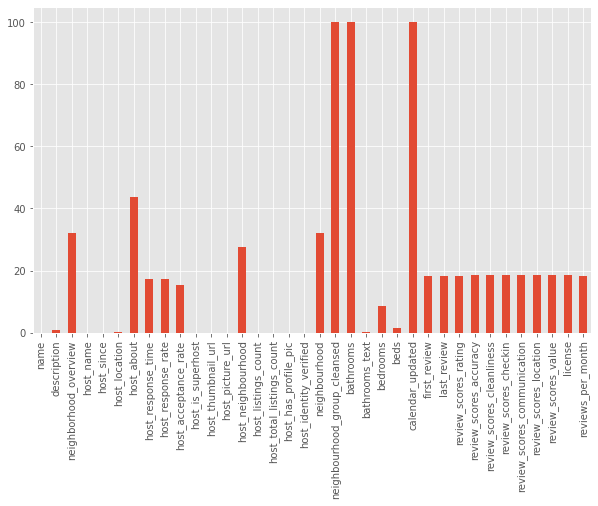

In [5]:
#find percentage of missing values for each column
listings_missing_df = listings_df.isnull().mean()*100

#filter out only columns, which have missing values
listings_columns_with_nan = listings_missing_df[listings_missing_df > 0]

#plot the results
plt.rcParams["figure.figsize"] = (10,6)
listings_columns_with_nan.plot.bar()

# Import Calendar Dataset

In [6]:
#read the dataset
calendar_df = pd.read_csv('C:/Users/polym/calendar.csv')

#find number of rows and columns in dataset
rows_num = calendar_df.shape[0]
cols_num=calendar_df.shape[1]

#find first and last date of the calendar
min_date = calendar_df['date'].min()
max_date = calendar_df['date'].max()

print('calendar.csv dataset contains %d rows and %d columns.' % (rows_num,cols_num))
print('The first date of observation is %s and the last date is %s.' % (min_date, max_date))

#print first 10 rows of calendar dataset                                                                                          #hosts_number))
calendar_df.head()

calendar.csv dataset contains 3530645 rows and 7 columns.
The first date of observation is 2021-12-23 and the last date is 2022-12-22.


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1927601,2021-12-23,f,$65.00,$65.00,1,14
1,1927601,2021-12-24,t,$65.00,$65.00,1,14
2,1927601,2021-12-25,t,$65.00,$65.00,1,14
3,1927601,2021-12-26,t,$65.00,$65.00,1,14
4,1927601,2021-12-27,t,$65.00,$65.00,1,14


In [7]:
print('calendar.csv dataset contains %d rows and %d columns.' % (rows_num,cols_num))

#print first 10 rows of calendar dataset                                                                                          #hosts_number))
calendar_df.head(2)

calendar.csv dataset contains 3530645 rows and 7 columns.


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1927601,2021-12-23,f,$65.00,$65.00,1,14
1,1927601,2021-12-24,t,$65.00,$65.00,1,14


# Missing Values in Calendar Dataset

<AxesSubplot:title={'center':'Missing values per column, %'}>

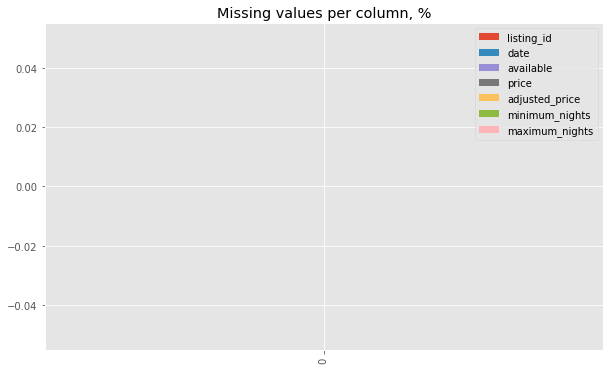

In [8]:
#get percentage of missing values for each column in dataset
calendar_missing_df = pd.DataFrame([calendar_df.isnull().mean()*100])

#plot the results
plt.rcParams["figure.figsize"] = (10,6)
calendar_missing_df.plot.bar(title='Missing values per column, %')

# Preprocess Step

# i) Left Join Calendar and Listings datasets on Listing_id

In [9]:
#rename id column as listing_id in order to match the join afterwards
listings_df = listings_df.rename(index=str, columns={"id": "listing_id"})

#left join two datasets on listing_id to obtain a combined dataframe
df = pd.merge(calendar_df, listings_df, on = 'listing_id',how="left")

# ii) Columns Data Transformations 

In [10]:
#extract month from date represented as a string
df['month'] = df.apply(lambda row: int(row['date'].split('-')[1]),axis=1)

#extract year from date represented as a string
df['year'] = df.apply(lambda row: int(row['date'].split('-')[0]),axis=1)

#convert price to number eliminating the $ sign
df['price'] = df['price_x'].astype(str)
df['price'] = df['price'].str.replace("[$, ]", "").astype("float")

#extract month name from month represented as an integer
df["month_name"]=df['month'].apply(lambda row: calendar.month_abbr[row])

#extract day name from month represented as date 
df["day_name"]=df['date'].apply(lambda row: pd.Timestamp(row).day_name())

# iii) Remove Missing Rows and Impute Missing Information

In [ ]:
#remove rows from dataframe where price_x == nan, because price will be used as response column
df = df.dropna(subset=['price_x'])

#impute missing values with mean value for host_listings_count
df['host_listings_count'].fillna(df['host_listings_count'].mean(), inplace = True)
    
#impute in missing values for bedrooms and beds with mode
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])
df['beds'] = df['beds'].fillna(df['beds'].mode()[0])
    
    
#fill missing values for review scores columns
review_scores_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                         'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                        'review_scores_value']

#iterate over all review_score_columns to impute with the mean of each respective column
for column in review_scores_columns:    
    df[column].fillna(df[column].mean(), inplace = True)

# iii) Drop Redundant or Full Missing Columns

In [ ]:
#the list of irrelevant columns
columns_to_drop = ['available', 'host_id','host_location','host_acceptance_rate','host_neighbourhood',
                   'host_total_listings_count', 'calendar_updated',
                   'listing_url','last_scraped' ,'scrape_id', 'name', 'description',
                    'neighbourhood', 'neighbourhood_cleansed',"neighbourhood_group_cleansed","bathrooms",
                   'neighborhood_overview', 'picture_url',
                    'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                    'has_availability', 'availability_30',
                   'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped',
                  'first_review', 'last_review', 'license', 'price_y',
                  'reviews_per_month','date','price_x','host_response_rate']

#drop only the irrelevant columns
df=df.drop(columns=columns_to_drop)

# iv) Filter only listings of 2022

In [ ]:
#we will focus only on listings of 2022
df=df[df["year"]==2022]
df.shape

In [ ]:
#set figure size
plt.rcParams["figure.figsize"] = (10,6)

#set x tick-marks
x_ticks_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

#group by month and month name and aggregate over average price
my=df.groupby(['month',"month_name"],sort = True).mean()['price']

#drop index month_name
my=my.reset_index(level=["month_name"],drop=True)

#object oriented programming for the plot
fig, ax = plt.subplots(1,1) 
ax.plot(list(my.index),my.values,marker = 'o',color="fuchsia")

# Set number of ticks for x-axis
ax.set_xticks(list(my.index))
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=20)
ax.set_ylabel("Price ($)", fontsize=20)
ax.set_xlabel("Month", fontsize=20)
plt.title("Monthly Average Prices in Athens",loc='left', fontsize=20)
plt.yticks(fontsize=20)

In [ ]:
my=df[['month','price']].groupby('month').agg(['mean','std','count']).round(2).reset_index()
my["month"]=my['month'].apply(lambda x: calendar.month_abbr[x])
my.rename(columns={'mean': 'Average','std':'Standard Deviation','count':'#Listings'},level=1,inplace=True) 
my.rename(columns={'month': 'Month','price':'Price'},level=0,inplace=True) 
my.set_index('Month',inplace=True)
print(tabulate(my, headers=["Month","Average Price","Standard Deviation", "#Listings"], tablefmt='fancy_grid',showindex='always'))

In [ ]:
plt.rcParams["figure.figsize"] = (10,6)
x_ticks_labels = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
my=df.groupby(['day_name'],sort = True).mean()['price']
my=my.reset_index()
my["day_name"]=[5,1,6,7,4,2,3]
my.set_index('day_name',inplace=True)
my.sort_index(inplace=True)

fig, ax = plt.subplots(1,1) 
ax.plot(list(my.index),my.values,marker = 'o',color="fuchsia")

# Set number of ticks for x-axis
ax.set_xticks(list(my.index))
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=20)
ax.set_ylabel("Price ($)",fontsize=20)
ax.set_xlabel("Day of Week",fontsize=20)
plt.title("Daily Average Prices in Athens",loc='left',fontsize=20)
plt.yticks(fontsize=20)

In [ ]:
my=df[["day_name","price"]].groupby(['day_name'],sort = True).agg(['mean','std','count']).round(2)
my=my.reset_index()
my["day_name"]=[5,1,6,7,4,2,3]
my.set_index('day_name',inplace=True)
my.sort_index(inplace=True)
my=my.reset_index()
my["day_name"]=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
my.set_index('day_name',inplace=True)
print(tabulate(my, headers=["Day of Week","Average Price","Standard Deviation", "#Listings"], tablefmt='fancy_grid',showindex='always'))

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
my=df.groupby(['property_type']).mean().sort_values('price', ascending=False)["price"]

plt.bar(list(my.index)[0:4],my.values[0:4],width=0.3,color="fuchsia")
plt.ylabel("Price ($)",fontsize=24)
plt.xlabel("Property",fontsize=24)
plt.title("Top 4 Luxurious Properties in Athens",loc='left',fontsize=24)
plt.xticks(rotation=45, ha="right",fontsize=24)
plt.yticks(fontsize=24)

In [ ]:
my=round(df["property_type"].value_counts()/df.shape[0]*100,2)[0:8]
plt.bar(list(my.index)[0:4],my.values[0:4],width=0.3,color="fuchsia")
plt.ylabel("%",fontsize=24)
plt.xlabel("Property",fontsize=24)
plt.title("Top 4 Popular Properties in Athens",loc='left',fontsize=24)
plt.xticks(rotation=45, ha="right",fontsize=24)
plt.yticks(fontsize=24)

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
my=df.groupby(['room_type']).mean().sort_values('price', ascending=False)["price"]

plt.bar(list(my.index),my.values,width=0.3,color="fuchsia")
plt.ylabel("Price ($)",fontsize=24)
plt.xlabel("Room",fontsize=24)
plt.title("Top 4 Luxurious Rooms in Athens",loc='left',fontsize=24)
plt.xticks(rotation=45, ha="right",fontsize=24)
plt.yticks(fontsize=24)

In [ ]:
my=round(df["room_type"].value_counts()/df.shape[0]*100,2)
plt.bar(list(my.index),my.values,width=0.3,color="fuchsia")
plt.ylabel("%",fontsize=24)
plt.xlabel("Room",fontsize=24)
plt.title("Top 4 Popular Rooms in Athens",loc='left',fontsize=24)
plt.xticks(rotation=45, ha="right",fontsize=24)
plt.yticks(fontsize=24)

In [ ]:
#find number of total number of listings for each month in 2016
number_of_listings_by_month = pd.Series([12])
for i in range(1, 13):
    number_of_listings_by_month[i] = len(df[(df['month'] == i) & (df['year'] == 2022)]['listing_id'].unique())
    
number_of_listings_by_month = number_of_listings_by_month.drop(0)

#plot

plt.plot(number_of_listings_by_month)


In [ ]:
df.property_type.value_counts()

In [ ]:
df.columns

In [ ]:
sns.pairplot(df)